# Introduction to Machine Learning

In these notes we will introduce the basic definitions, notations and abstractions used in the course.

First we give an overview of ML and then start exploring supervised learning in detail.



### What's learning?

There is no official definition of what it means for a machine to learn.

This is a philosophical question.

But we can roughly say:  Performance should improve with experience.


### A motivating example: Cat recognition

Consider the problem of determining whether an image contains a picture of a cat.

A human being might try to give rules for recognizing a cat.

But what would they be?

They would be a complicated mess and probably not work very well.  

We do not teach babies to recognize cats by giving them rules.

We give them data:  lots of examples of cats.


[cat](https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fi.redditmedia.com%2FjNFvI-jjCVq_7o-2LDDOBhLiT10SGz0Th48j0QGuR6c.jpg%3Fw%3D320%26s%3Df61235809979a6b5def841c38814b210&f=1&nofb=1)

[cat?](https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fi.ytimg.com%2Fvi%2FfeB5tm4wM5U%2Fmaxresdefault.jpg&f=1&nofb=1)

[cat?](https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Ftse4.mm.bing.net%2Fth%3Fid%3DOIP.UBtefQmk8W6OKrC5Udl1wgHaD4%26pid%3DApi&f=1)

### Cat recognition cont.

We want to do the same thing with a machine that we did with the baby.

Namely:  Let the machine come up with its own model of cathood by seeing lots of sample images.

Machine learning gives a framework for how to do this.

Often we have no idea how the machine representation of cathood works, even though the learning procedure was designed by humans.

### Basic problem types

The problem we just described is a **classification** problem:

There are two categories: cat and no-cat

The problem is to take an image and classify it.

That is, we want to assign the image to the right category.


### Classification problems

Let $\mathcal{X}$ denote the space of all images.

For instance, $\mathcal{X}$ might be all grayscale images with 256x256 pixels.

We will assume that each element of $\mathcal{X}$ is a vector, and denote elements of $\mathcal{X}$ as $\bar{x} \in \mathcal{X}$.

Let $\mathcal{Y}$ denote the possible classifications: $\mathcal{Y} = \{0,1\}$

where `1=cat` and `0=no cat`. 

Let $f: \mathcal{X} \rightarrow \mathcal{Y}$ be the **ideal classifier**:  For every $\bar{x} \in \mathcal{X}$, $f(x)$ is the correct classification for $\bar{x}$.

It is useful to talk about $f$ but we don't really understand it and probably can never find it.



### The hypothesis space

We want to search for $f$ but we probably can't search the space of all functions from $\mathcal{X}$ to $\mathcal{Y}$, denoted ${}^\mathcal{X}\mathcal{Y}$.

It's too big and unstructured.  

If there are only 1000 images in $\mathcal{X}$ then ${}^\mathcal{X}\mathcal{Y}$ already has cardinality $|\mathcal{Y}|^{|\mathcal{X}|} =  2^{1000}$.

Making matters worse, there are, in reality, a virtually unlimited set of images. 

Rather than try to search brute force through ${}^\mathcal{X}\mathcal{Y}$, we propose a **hypothesis space** $\mathcal{H} \subseteq {}^\mathcal{X}\mathcal{Y}$.

This is usually a "nice" set of functions that can be efficiently searched.

### Wait... what's $\mathcal{H}$?

Exactly what $\mathcal{H}$ is depends on the learning algorithm.

When using linear classification, $\mathcal{H}$ might be determined by linear functions.

For example if $\mathcal{X} = \mathbb{R}^2$ and $\mathcal{Y} = \{0,1\}$, we could have

$\mathcal{H} = \{ [\![ ax_1 + bx_2 + c > 0]\!] : a,b,c \in \mathbb{R}\}$

where $[\![P]\!]$ is 0 if $P$ is false and 1 if $P$ is true.

This is a family of functions from $\mathcal{X} \rightarrow \mathcal{Y}$.


### Wait... what's $\mathcal{H}$?

When using neural networks, $\mathcal{H}$ might be all functions that can be represented as a neural net of a certain size.

In this class we will discuss many learning algorithms and describe their hypothesis spaces -- here we're just trying to give an abstract overview of **any** learning algorithm.

### But what if $f$ is not in $\mathcal{H}$?

Almost certainly $f$, the ideal classifier, is not in $\mathcal{H}$.  

All we can hope to find is the $g \in \mathcal{H}$ that best approximates $f$.

Exactly what "best" means and how exactly $\mathcal{H}$ is searched depends on the learning algorithm $\mathcal{A}$.

Ideally we want the function in $\mathcal{H}$ closest to $f$ when *all possible* images are considered.

In practice we have to use only the data we own, and hope that our data is representative.


### Oh yeah, the data.  How does that fit in?

Exactly what we do with the data depends on what kind of data we have.

In a problem like cat classification, usually we have a set of **labeled examples**.

That means we have a bunch of images, say $\bar{x}_1,\bar{x}_2,\ldots,\bar{x}_n$.

Corresponding to each $\bar{x}_i$ we also have a **label** $y_i \in \mathcal{Y}$ which tells us whether $\bar{x}_i$ is an example of a cat, or a non-example of a cat.

A dataset will typically contain both examples and non-examples.  They may or may not be proportionally represented.  Maybe most pictures in our dataset are **not** pictures of cats.


### The data tells us a little about $f$

We can represent our dataset like this:

$\mathcal{D} = \{(\bar{x}_1,y_1),(\bar{x}_1,y_1),\ldots,(\bar{x}_n,y_n)\}$

Usually we assume the labels are all correct.  This means that for all $i = 1,\ldots,n$,

$$f(\bar{x}_i) = y_i$$

In other words $\mathcal{D}$ is like a finite sample from $f$.

### An overview of learning

We can now describe how machine learning basically works.

There is something we want to learn, in this case the ideal cat classifier $f:\mathcal{X}\rightarrow \mathcal{Y}$. 

We have a finite set of labeled examples of the way $f$ behaves.  This is the training data $\mathcal{D}$. 

We decide on a hypothesis space $\mathcal{H}$ which are the functions we will search for an approximation to $f$.

The learning algorithm $\mathcal{A}$ searches $\mathcal{H}$ and produces a final hypothesis $g$.

We hope that for randomly chosen images $\bar{x}$, probably $g(\bar{x}) = f(\bar{x})$.



### A simple example: Perceptron learning

The [perceptron](https://en.wikipedia.org/wiki/Perceptron) is an idea that dates back to 1958.  It is supposed to be somewhat like a single neuron.  Neural nets are made up of perceptrons.

However here we will just focus on a single perceptron. 

In principle you could use a perceptron for our cat classification problem.

When we describe the perceptron we will basically be explaining $\mathcal{X},\mathcal{Y},\mathcal{H}$, and $\mathcal{A}$.


### Perceptron learning: $\mathcal{X}$ and $\mathcal{Y}$

The input space to a perceptron is $\mathcal{X}=\mathbb{R}^d$, where $\mathbb{R}^d$ is $d$ dimensional Euclidean space.  

We could write $\bar{x} = [x_1,x_2,\ldots,x_d]^T$ where the $x_i$ are real numbers.

The meaning of $x_1,x_2,\ldots,x_d$ depend on the features in the data (height, weight, shoe-size, etc.).

We use the compact notation $[x_1,x_2,\ldots,x_d]^T$ to represent a column vector as a row.

\begin{align}
    [x_1,x_2,\ldots,x_d]^T &= \begin{bmatrix}
           x_{1} \\
           x_{2} \\
           \vdots \\
           x_{d}
         \end{bmatrix}
\end{align}
  
There are two possible classifications, $\mathcal{Y} = \{+1,-1\}$. 


### Perceptrons

The hypothesis space of perceptrons is built of of linear functions in variables $x_1,x_2,\ldots,x_d$. For example if $d=2$, we might have

$\mathcal{H} = \{sign(a+ bx_1 + cx_2) : a,b,c \in \mathbb{R}\}$

where sign is +1 for non-negative inputs and -1 for negative inputs.


### Perceptrons

It would be convenient if we could represent $ax_1 + bx_2 + c$ as the dot product

$$[a,b,c][1,x_1,x_2]^T=
\begin{align}
    [a,b,c]  \begin{bmatrix}
           1 \\
           x_{1} \\
           x_{2}
         \end{bmatrix}
\end{align} = a+bx_1 + cx_2
$$

The advantage to doing this is so great that we will change $\mathcal{X}$ a little bit to make it possible.  **We will assume that the first coordinate of all $\bar{x} \in \mathcal{X}$ is 1.**  

$\mathcal{X} = \{1\}\times\mathbb{R}^d$

This is called "adding a bias column".

### Perceptrons

We can now express $\mathcal{H}$ very concisely:

$\mathcal{H} = \{ sign(\bar{w}\cdot \bar{x}) : \bar{w} \in \mathbb{R}^{d+1}\}$

where $\displaystyle \bar{w}\cdot \bar{x} = \sum_{i=0}^d w_ix_i$ is the dot product, and $x_0=1$.

### Boundaries

Geometrically an $h \in \mathcal{H}$ divides $\mathbb{R}^d$ into two parts:

positive predictions:

$$\{\bar{x}\in\mathbb{R}^d: h(1,\bar{x})=+1\}$$

negative predictions:

$$\{\bar{x}\in\mathbb{R}^d: h(1,\bar{x})=-1\}$$

The separation between these two regions is called the **decision boundary**.


### Boundaries

The perceptron is a linear model that creates "flat" decision boundaries.

When $d=2$ the decision boundary is a line in $\mathbb{R}^2$.

When $d=3$ the decision boundary is a plane in $\mathbb{R}^3$.

For higher $d$ we say the boundary is a **hyperplane**.

Algebraically a hyperplane in $\mathbb{R}^d$ is just the set of solutions to the equation

$$[1,x_1,x_2,\ldots,x_d][w_0,w_1,\ldots,w_d]^T = 0$$

Geometrically it is a subset that divides the space into two convex parts.


### Let's see a boundary!

Below we use matplotlib to look at some real boundaries when $d=2$.

If you want to see "under the hood" you can look in the file called `mystuff.py` which is in this directory.


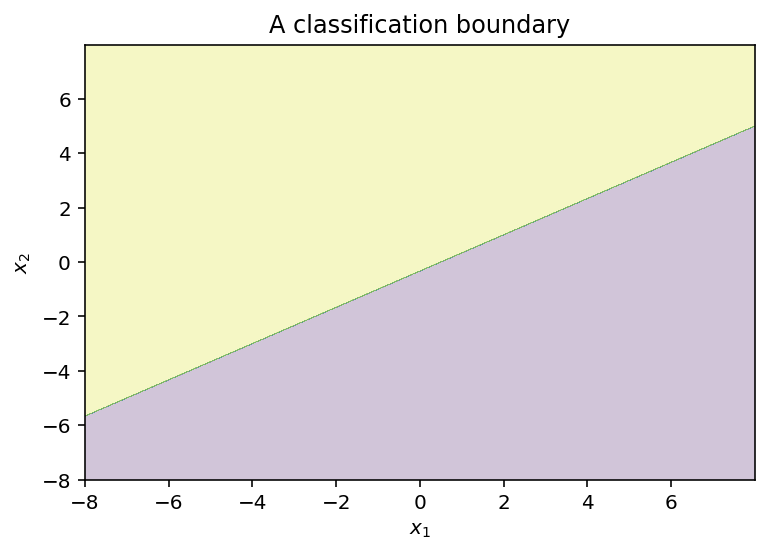

In [1]:
import numpy as np
import mystuff as ms


X=np.array([]).reshape(0,3)
y=np.array([])
w = np.array([1,-2,3])
ms.lin_boundary(w,X,y)

### Adding some data points

Below we add some data to the plot.  

There are some positive examples (blue) and negative examples (red).

The boundary we have classifies them most data correctly (but not all).

"Learning" in the sense of classification is finding the "best" boundary.


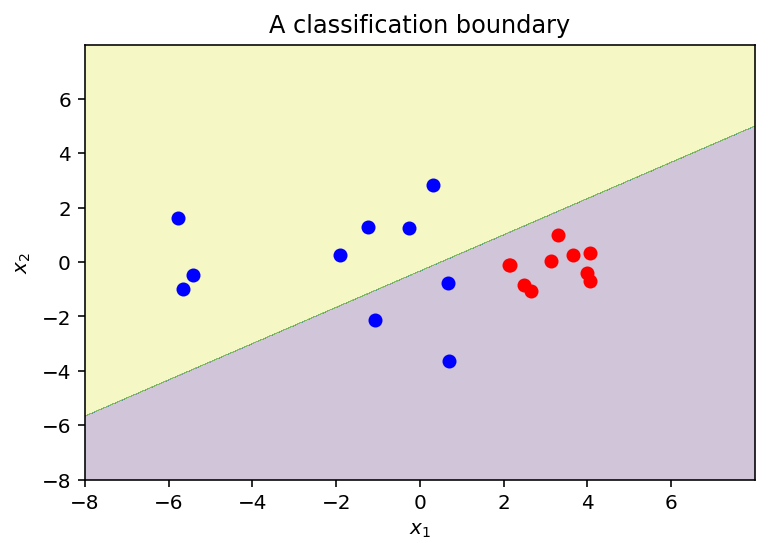

In [2]:
N = 10
mu_yes = [-2,0]
sig_yes = 2
X_yes=np.ones(3*N).reshape(N,3)
X_yes[:,0] = np.ones(N)
X_yes[:,1]=np.random.randn(N)*sig_yes+mu_yes[0]
X_yes[:,2]=np.random.randn(N)*sig_yes+mu_yes[1]

y_yes=np.ones(N)

mu_no = [3,0]
sig_no = 0.7
X_no=np.ones(3*N).reshape(N,3)
X_no[:,0] = np.ones(N)
X_no[:,1]=np.random.randn(N)*sig_no+mu_no[0]
X_no[:,2]=np.random.randn(N)*sig_no+mu_no[1]

y_no=np.ones(N)*(-1)

X = np.vstack((X_yes,X_no))
y = np.hstack((y_yes,y_no))
w = np.array([1,-2,3])
ms.lin_boundary(w,X,y)


In [3]:
#misclassified
mc = np.sign(X.dot(w))!= y
X[mc]

array([[ 1.        , -1.0772671 , -2.13934413],
       [ 1.        ,  0.67772068, -0.77271115],
       [ 1.        ,  0.69720397, -3.65212875]])

### Predictions

The boundary is a way of visualizing the predictions that the algorithm $\mathcal{A}$ will make on new instances that are not in $\mathcal{D}$.

Any $\bar{x}$ that arises in the yellow region will be predicted as "blue" by $\mathcal{A}$.

Any $\bar{x}$ that arises in the purple region will be predicted to be "red" by $\mathcal{A}$. 

Hopefully this prediction will be true as often as possible.


### The Perceptron Learning Algorithm (PLA)

We have seen from the above that the decision boundary made by a perceptron is determined by the weight vector $\bar{w}\in \mathbb{R}^{d+1}$.

The PLA works by finding progressively better $\bar{w}$.

There are a series of time steps $t=0,1,\ldots$.

At each time there is a weight vector $\bar{w}_t$.

The initial weights $\bar{w}_0$ can be random, or the zero vector.



## The PLA update rule

The heart of the PLA is how the weight vector is updated at each time step.

The pseudocode for PLA is:

1. Initialization: $t=0$, $\bar{w}_0 = \bar{0}$ 
2. While a misclassified instance $(\bar{x},y)$ exists in $\mathcal{D}$:
3. $\,\,\,\,\bar{w}_{t+1} = \bar{w}_{t}+y\bar{x}$
4. $\,\,\,\,t = t+1$

### The PLA update rule

Geometrically the update rule moves the decision boundary toward the misclassified point. 

It continues until there are no misclassified examples.

For linearly separable data it always eventually terminates. 

1. Initialization: $t=0$, $\bar{w}_0 = \bar{0}$ 
2. While a misclassified instance $(\bar{x},y)$ exists in $\mathcal{D}$:
3. $\,\,\,\,\bar{w}_{t+1} = \bar{w}_{t}+y\bar{x}$
4. $\,\,\,\,t = t+1$

### A worked example

Below we write a little big of code to do one PLA update on some data.

Notice that the update fixes the single misclassified point.


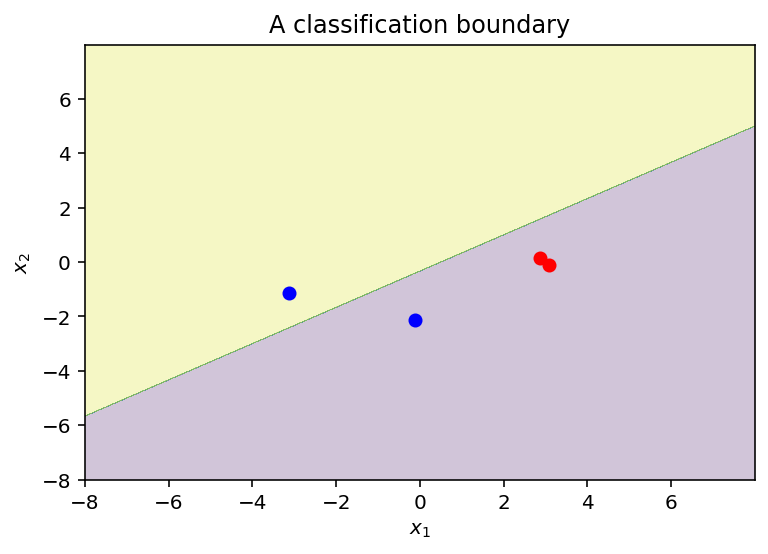

In [4]:
np.random.seed(76)
N = 2
mu_yes = [-2,0]
sig_yes = 2
X_yes=np.ones(3*N).reshape(N,3)
X_yes[:,0] = np.ones(N)
X_yes[:,1]=np.random.randn(N)*sig_yes+mu_yes[0]
X_yes[:,2]=np.random.randn(N)*sig_yes+mu_yes[1]

y_yes=np.ones(N)

mu_no = [3,0]
sig_no = 0.7
X_no=np.ones(3*N).reshape(N,3)
X_no[:,0] = np.ones(N)
X_no[:,1]=np.random.randn(N)*sig_no+mu_no[0]
X_no[:,2]=np.random.randn(N)*sig_no+mu_no[1]

y_no=np.ones(N)*(-1)

X = np.vstack((X_yes,X_no))
y = np.hstack((y_yes,y_no))
w = np.array([1,-2,3])
ms.lin_boundary(w,X,y)


In [5]:
#misclassified
mc = np.sign(X.dot(w))!= y
X[mc]

array([[ 1.        , -0.11939738, -2.11907271]])

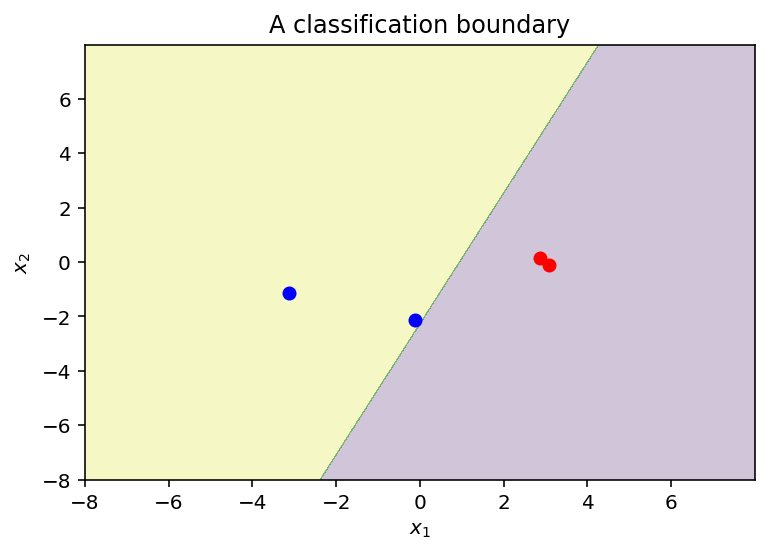

In [7]:
badx = X[mc][0]
bady = y[mc][0]
w = w+bady*badx
ms.lin_boundary(w,X,y)

In [8]:
#misclassified
mc = np.sign(X.dot(w))!= y
X[mc]

array([], shape=(0, 3), dtype=float64)

### What if the data is not linearly separable?

If the data is not linearly separable then the algorithm will never terminate.

This is obvious because the set of misclassified points can by definition never be empty.

As long as a single point is misclassified, the algorithm keeps going.

We give an example of this below.


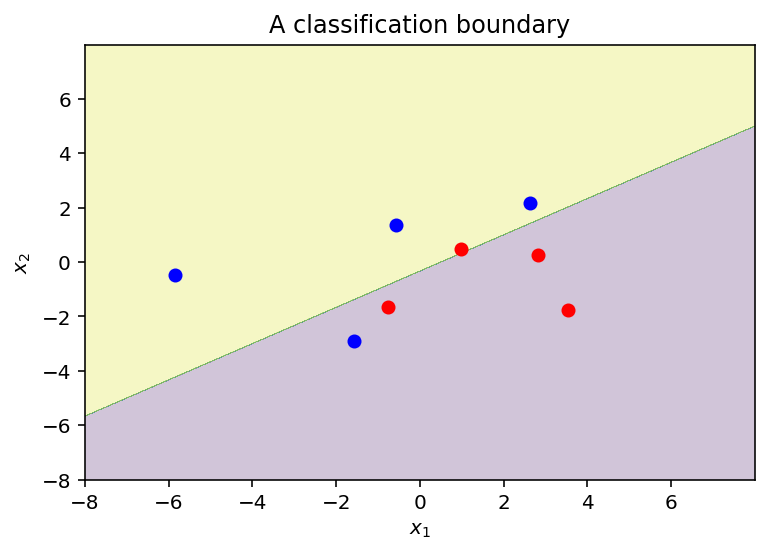

In [9]:
np.random.seed(19191)
N = 4
mu_yes = [-2,0]
sig_yes = 2
X_yes=np.ones(3*N).reshape(N,3)
X_yes[:,0] = np.ones(N)
X_yes[:,1]=np.random.randn(N)*sig_yes+mu_yes[0]
X_yes[:,2]=np.random.randn(N)*sig_yes+mu_yes[1]

y_yes=np.ones(N)

mu_no = [3,0]
sig_no = 1.5
X_no=np.ones(3*N).reshape(N,3)
X_no[:,0] = np.ones(N)
X_no[:,1]=np.random.randn(N)*sig_no+mu_no[0]
X_no[:,2]=np.random.randn(N)*sig_no+mu_no[1]

y_no=np.ones(N)*(-1)

X = np.vstack((X_yes,X_no))
y = np.hstack((y_yes,y_no))
w = np.array([1,-2,3])
ms.lin_boundary(w,X,y)


In [10]:
#misclassified
mc = np.sign(X.dot(w))!= y
X[mc]

array([[ 1.        , -1.58159474, -2.90885798],
       [ 1.        ,  0.97402525,  0.4954294 ]])

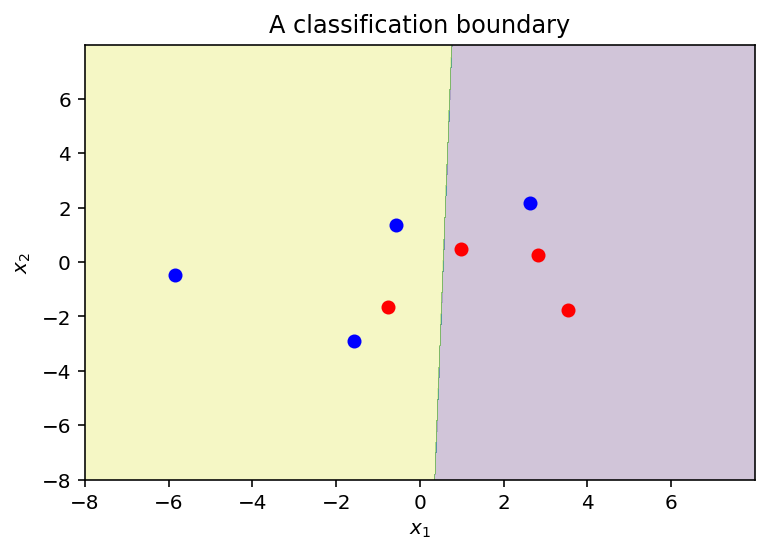

In [11]:
badx = X[mc][0]
bady = y[mc][0]
w = w+bady*badx
ms.lin_boundary(w,X,y)

In [12]:
#misclassified
mc = np.sign(X.dot(w))!= y
X[mc]

array([[ 1.        ,  2.61879316,  2.1669837 ],
       [ 1.        , -0.7647271 , -1.65228359]])

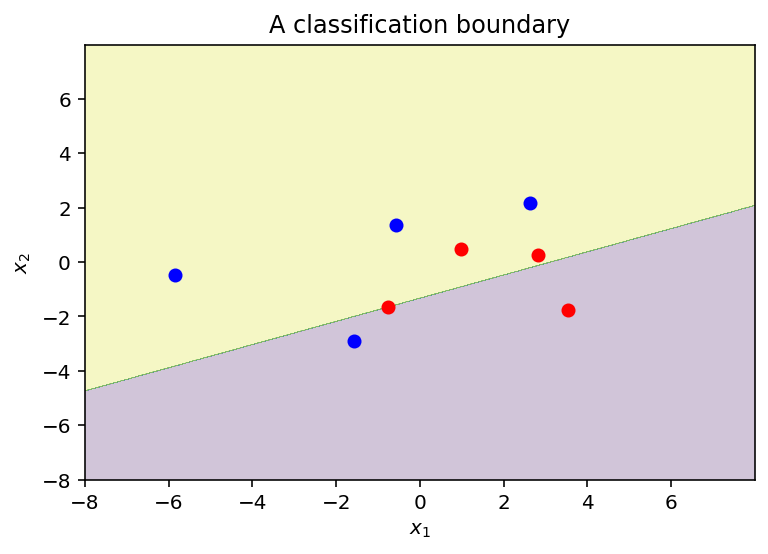

In [13]:
badx = X[mc][0]
bady = y[mc][0]
w = w+bady*badx
ms.lin_boundary(w,X,y)

In [14]:
#misclassified
mc = np.sign(X.dot(w))!= y
X[mc]

array([[ 1.        , -1.58159474, -2.90885798],
       [ 1.        ,  0.97402525,  0.4954294 ],
       [ 1.        ,  2.82539962,  0.24628874],
       [ 1.        , -0.7647271 , -1.65228359]])

###  Other kinds of learning

In the discussion until now we have discussed a very particular kind of learning.

1. Supervised (labels are known)
    1. Batch (because all data available at start)
        1. Classification (because $\mathcal{Y}$ is discrete)
            1. Binary classification (because $|\mathcal{Y}|=2$)

Below we give some definitions that sketch out the more general landscape of ML.



### Batch vs Online learning

Often all data is available at the start of a ML project.  

In other words $\mathcal{D}$ is complete and does not change.  

This is called **batch** learning.  

In another scenario $\mathcal{D}$ might be constantly growing as additional data points are added.

This idea is called **online** learning.  

In online learning you often talk about "mistake bounds":  The maximum number of times the algorithm will make a wrong prediction.  

In most real ML applications the dataset gets enlarged from time to time and you have to retrain everything. 

### Supervised vs Unsupervised learning

For the work we did above our dataset $\mathcal{D}$ included labels.  

That is, $\mathcal{D}$ consists of pairs $(\bar{x},y)$ where

$$f(x)=y$$

This is called **supervised learning**.

Often the correct labels are painstakingly provided by humans (Taskrabbit, Mechanical Turk). 


### Unsupervised learning

However you might have unlabeled data.  

You should still be able to extract information from this data (called **unsupervised learning**).

For example a bunch of datapoints $\bar{x}_1,\bar{x}_2,\ldots,\bar{x}_n$ gives information about the probability distribution $P(\mathcal{X}=\bar{x})$ that "generates" the data.

There might also be natural clusters in the data that you can discover.

You can try to reduce the dimensionality of the data and create various visualizations.

### Classification vs Regression

In the example we did above we used $\mathcal{Y} = \{-1,1\}$.

In **classification** $\mathcal{Y}$ is discrete and almost always finite. 

In **regression** $\mathcal{Y}$ may take on a continuous range of values. 

For example $\mathcal{X}$ may describe the vital stats of various toddlers.  Then $\mathcal{Y}$ might be the height of the toddler at age 30.  

### Regression

Regression retains the same basic setup as classification.

It is still a form of supervised learning. 

There is still an ideal $f:\mathcal{X} \rightarrow \mathcal{Y}$ that we want to learn.

There is still a hypothesis space $\mathcal{H}$ of functions $h:\mathcal{X} \rightarrow \mathcal{Y}$.

The plan is still to somehow find the $g \in \mathcal{H}$ that best approximates $f$.

Often the same algorithm can be used for classification or regression with only minor changes.  

### Multiclass classification

In the cat example and the work with the perceptron we did **binary classification**.

In other words we wanted to map each instance into one of two categories.

Sometimes the problem might be to predict which of several discrete categories an instance $\bar{x}$ belongs to.  This is called **multiclass classification**.

For example you might want to take data about a piece of meat and classify it as "Grade A", "Grade B", "Grade C" or "Grade F (reject)".

You might also think about automatically classifying sprains from radiological images.


###  Multiclass classification

There are generic techniques which we will discuss later for extending binary classifiers to multiclass classifiers.

Some algorithms, for example neural nets, "naturally" support multiclass classification. 
